# Data science approach to organizing my playlist
[Complete Post](https://arjon.es/2020/data-science-approach-to-organizing-my-playlist/)

## Clustering with pycaret

In [6]:
import pandas as pd
data = pd.read_csv('my-playlist.csv')

In [7]:
data.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'loudness',
       'valence', 'speechiness', 'instrumentalness', 'liveness',
       'acousticness'],
      dtype='object')

In [8]:
# Select columns to keep on dataset
COLUMNS_KEEP = ['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'valence'] #, 'liveness', 'acousticness']

data = data[COLUMNS_KEEP]
data.columns

Index(['track_id', 'track_name', 'danceability', 'energy', 'tempo', 'valence'], dtype='object')

In [9]:
data.describe()

,danceability,energy,tempo,valence
count,299.000000,299.000000,299.000000,299.000000
mean,0.598886,0.629162,119.993211,0.574082
std,0.146012,0.213013,26.798519,0.246125
min,0.128000,0.040600,65.179000,0.059100
25%,0.497500,0.479000,99.934500,0.383500
50%,0.615000,0.655000,119.344000,0.588000
75%,0.704000,0.801000,138.004000,0.766500
max,0.941000,0.977000,189.892000,0.985000


In [26]:
data['url'] = data[['track_id']].apply(lambda x: f"https://open.spotify.com/track/{x['track_id']}", axis=1)

In [27]:
from pycaret.clustering import *
s = setup(data, normalize = True, 
                   ignore_features = ['track_name', 'track_id', 'url'],
                   session_id = 42)


Setup Succesfully Completed!


,Description,Value
0,session_id,42
1,Original Data,"(299, 7)"
2,Missing Values,False
3,Numeric Features,4
4,Categorical Features,3
5,Ordinal Features,False
6,High Cardinality Features,False
7,Transformed Data,"(299, 4)"
8,Numeric Imputer,mean
9,Categorical Imputer,constant


In [28]:
# create_model?

[Clustering modules](https://scikit-learn.org/stable/modules/clustering.html)

In [29]:
# Create Model
m = create_model('kmeans', num_clusters=6)

In [30]:
print(m)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)


In [31]:
results = assign_model(m)

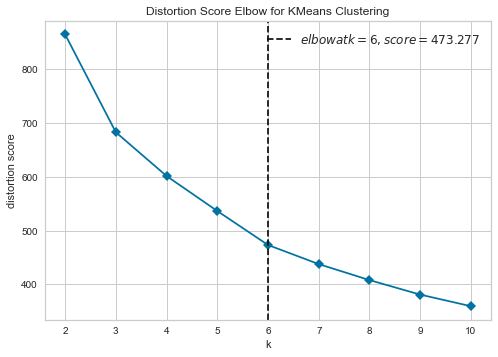

In [32]:
# Find best value of K
plot_model(m, plot = 'elbow')

In [33]:
plot_model(m, feature='track_name')

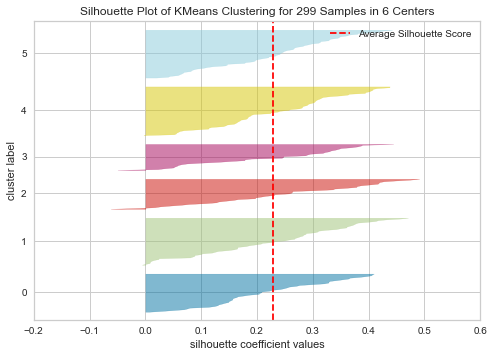

In [34]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
plot_model(m, plot = 'silhouette')

In [35]:
plot_model(m, plot = 'distribution') #to see size of clusters

In [36]:
results[['Cluster', 'track_name']].head(10)

,Cluster,track_name
0,Cluster 1,Have You Ever Seen The Rain
1,Cluster 4,Break It Down Again
2,Cluster 1,Stay
3,Cluster 1,A Visita
4,Cluster 1,O Que É O Que É?
5,Cluster 1,Loving Every Minute
6,Cluster 1,Nosso Pequeno Castelo
7,Cluster 0,Voce Abusou
8,Cluster 1,I Follow Rivers
9,Cluster 3,Relicário


In [53]:
def ddisplay(df):
    def make_clickable(url):
        return f'<a target="_blank" href="{url}">listen</a>'

    display(df.style.format({'url': make_clickable}))
    pass

# Check results
def select_cluster(id):
    _df = results[results['Cluster']==f'Cluster {id}'][['track_name', 'url']]
    return _df.sample(n=15, random_state=42)

In [54]:
ddisplay(select_cluster(3))

,track_name,url
288,18 and Life,listen
100,These Boots Are Made For Walkin',listen
233,Smiled At Me (Sorriu Para Mim),listen
118,Dream A Little Dream Of Me,listen
50,"Non, je ne regrette rien - Remasterisé En 2015",listen
54,The Thrill Is Gone,listen
157,Dona Cila,listen
174,Telegrama,listen
84,Dream a Little Dream of Me,listen
9,Relicário,listen
